# Candlestick Concealing Baby Swallow

https://patternswizard.com/concealing-baby-swallow-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'MU'
start = '2018-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,41.540001,43.720001,41.189999,43.669998,43.609039,37097000
2018-01-03,44.500000,45.049999,44.049999,44.980000,44.917213,43376700
2018-01-04,45.990002,46.980000,45.009998,46.880001,46.814564,52229500
2018-01-05,46.130001,46.660000,45.380001,45.799999,45.736069,47381100
2018-01-08,45.310001,46.090000,44.910000,45.549999,45.486416,32217400


## Candlestick with Concealing Baby Swallow

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,41.540001,43.720001,41.189999,43.669998,43.609039,37097000,True
1,736697.0,44.500000,45.049999,44.049999,44.980000,44.917213,43376700,True
2,736698.0,45.990002,46.980000,45.009998,46.880001,46.814564,52229500,True
3,736699.0,46.130001,46.660000,45.380001,45.799999,45.736069,47381100,False
4,736702.0,45.310001,46.090000,44.910000,45.549999,45.486416,32217400,True


Text(0, 0.5, 'Price')

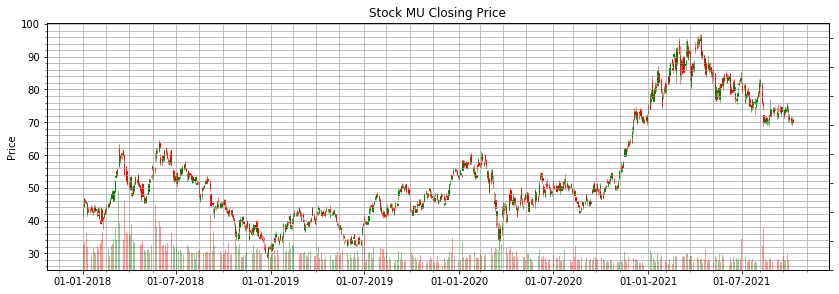

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
concealing_baby = talib.CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Close'])

concealing_baby = concealing_baby[concealing_baby != 0]

In [6]:
df['concealing_baby'] = talib.CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['concealing_baby'] !=0]

,Open,High,Low,Close,Adj Close,Volume,concealing_baby
Date,,,,,,,


In [8]:
df['Adj Close'].loc[df['concealing_baby'] !=0]

Series([], Name: Adj Close, dtype: float64)

In [9]:
df['Adj Close'].loc[df['concealing_baby'] !=0].index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
concealing_baby

Series([], dtype: int32)

In [11]:
concealing_baby.index

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,concealing_baby
Date,,,,,,,
2018-01-02,41.540001,43.720001,41.189999,43.669998,43.609039,37097000,0
2018-01-03,44.500000,45.049999,44.049999,44.980000,44.917213,43376700,0
2018-01-04,45.990002,46.980000,45.009998,46.880001,46.814564,52229500,0
2018-01-05,46.130001,46.660000,45.380001,45.799999,45.736069,47381100,0
2018-01-08,45.310001,46.090000,44.910000,45.549999,45.486416,32217400,0
...,...,...,...,...,...,...,...
2021-10-04,70.599998,71.570000,70.360001,70.620003,70.620003,19525700,0
2021-10-05,71.209999,71.209999,69.610001,70.500000,70.500000,14512100,0
2021-10-06,69.800003,70.379997,69.029999,69.940002,69.940002,17899300,0


Text(0, 0.5, 'Price')

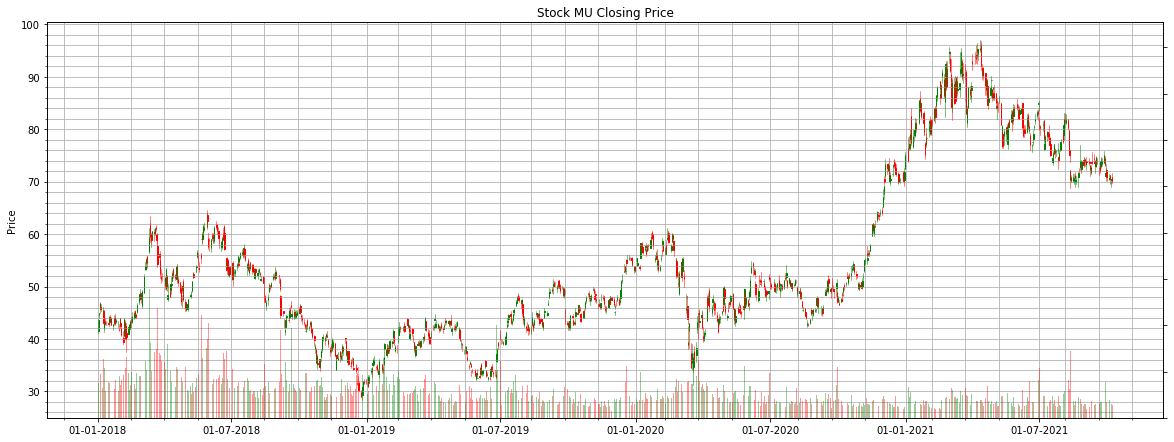

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['concealing_baby'] !=0].index, df['Adj Close'].loc[df['concealing_baby'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,concealing_baby,VolumePositive
0,738034.0,74.320000,74.320000,73.019997,73.720001,73.617096,14007100,0,False
1,738035.0,73.209999,74.010002,72.309998,73.989998,73.886719,14803300,0,True
2,738036.0,74.000000,74.720001,73.599998,73.809998,73.706970,9222500,0,False
3,738040.0,73.760002,74.489998,73.160004,73.639999,73.537209,12028400,0,False
4,738041.0,73.199997,73.239998,71.110001,72.269997,72.169113,17375500,0,False


Text(0, 0.5, 'Price')

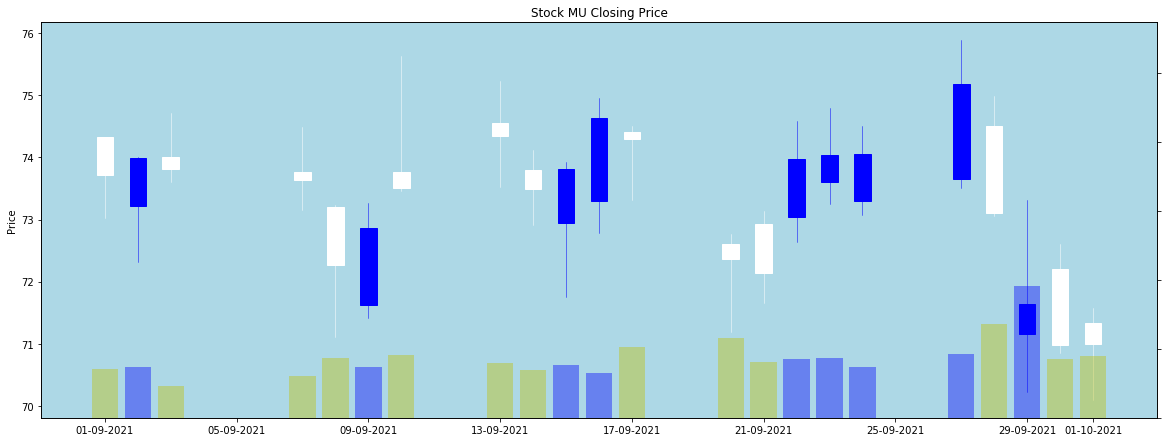

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='b', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['concealing_baby'] !=0].index, df['Adj Close'].loc[df['concealing_baby'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'b', False: 'y'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

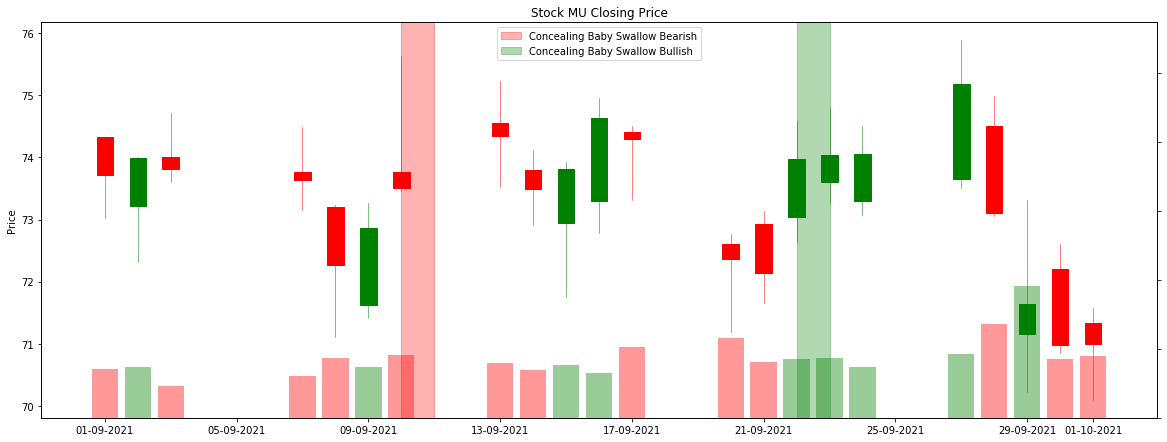

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,9,10)), date2num(datetime(2021,9,11)), 
           label="Concealing Baby Swallow Bearish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,22)), date2num(datetime(2021,9,23)), 
           label="Concealing Baby Swallow Bullish",color="green", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')